In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm # to build a LOWESS model
lowess = sm.nonparametric.lowess
import math
import sys
import os

import numpy as np
import matplotlib.dates as mdates
from matplotlib import gridspec
import matplotlib as mpl
import matplotlib
import matplotlib.font_manager as fm
#---------------MATPLOTLIB USER OPTIONS---------
tick_fontsize = 10
label_fontsize = 12
title_fontsize = 16
mpl.rcParams['font.family'] = 'Roboto'
plt.rcParams['axes.linewidth'] = 1.0
plt.rc('xtick', labelsize=tick_fontsize)
plt.rc('ytick', labelsize=tick_fontsize)
plt.rc('axes', labelsize=label_fontsize)
plt.rc('axes', titlesize=title_fontsize)
plt.rc('legend', fontsize=label_fontsize)    # legend fontsize
plt.rc('figure', titlesize=title_fontsize)  # fontsize of the figure title
plt.rcParams['axes.facecolor'] = 'None'

width = 6.88 
height = width/1.618 -1 

In [33]:
def load_discharge_data(gate, skip):
    discharge_data = pd.read_csv(data_dir + 'discharge/%s_gate_ice_discharge_v2.csv' % gate, index_col=1)
    discharge_data.index = pd.DatetimeIndex(discharge_data.index, dayfirst=True) # convert to datetime object
    # print(discharge_data.index)

    discharge_data = discharge_data.drop(discharge_data.columns[0],axis=1) # dropping first index column
    # discharge_data = discharge_data.drop(discharge_data.columns[1],axis=1)
    # discharge_data = discharge_data.drop(discharge_data.columns[1],axis=1)

    discharge_data_resamp = discharge_data.resample('D').interpolate() # resample to daily resolution

    return discharge_data_resamp

### Load in discharge data ############
data_dir = 'C:/Users/s1834371/Documents/GrIS_late-season-melt-event/data/'

skip = 0 
discharge_IS = load_discharge_data('IS', skip)
discharge_RUSSELL = load_discharge_data('RUSSELL', skip)
discharge_NORTH_NUNATAK = load_discharge_data('NORTH_NUNATAK', skip)
discharge_SOUTH_NUNATAK = load_discharge_data('SOUTH_NUNATAK', skip)
discharge_UNNAMED_SOUTH = load_discharge_data('UNNAMED_SOUTH', skip)

In [34]:
discharge_IS

,discharge,u_error,l_error,width_averaged_thickness,width_averaged_thickness_bedmachine
time,,,,,
2016-01-16,0.195469,0.065130,0.082504,289.1991,294.3438
2016-01-17,0.194483,0.064469,0.081920,289.1991,294.3438
2016-01-18,0.193497,0.063808,0.081336,289.1991,294.3438
2016-01-19,0.192511,0.063147,0.080752,289.1991,294.3438
2016-01-20,0.191525,0.062487,0.080167,289.1991,294.3438
...,...,...,...,...,...
2023-04-20,0.208592,0.111477,0.108516,286.1676,294.3438
2023-04-21,0.212432,0.115215,0.111331,286.1676,294.3438
2023-04-22,0.184265,0.100084,0.096438,286.1676,294.3438


Text(0.5, 0, 'Year')

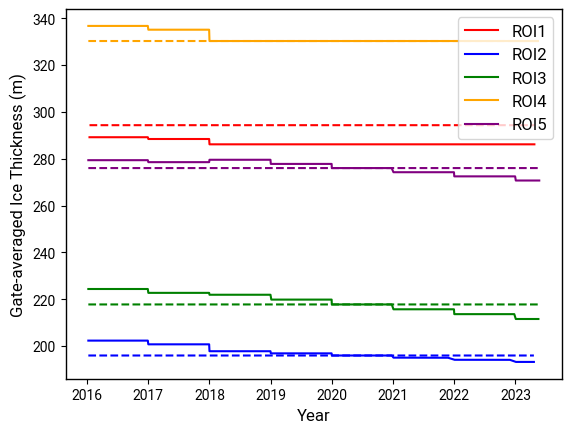

In [35]:
plt.plot(discharge_IS.index, discharge_IS['width_averaged_thickness'], label='ROI1', color='r')
plt.plot(discharge_IS.index, discharge_IS['width_averaged_thickness_bedmachine'], linestyle='--', color='r')

plt.plot(discharge_RUSSELL.index, discharge_RUSSELL['width_averaged_thickness'], label='ROI2', color='b')
plt.plot(discharge_RUSSELL.index, discharge_RUSSELL['width_averaged_thickness_bedmachine'], linestyle='--', color='b')

plt.plot(discharge_NORTH_NUNATAK.index, discharge_NORTH_NUNATAK['width_averaged_thickness'], label='ROI3', color='g')
plt.plot(discharge_NORTH_NUNATAK.index, discharge_NORTH_NUNATAK['width_averaged_thickness_bedmachine'], linestyle='--', color='g')

plt.plot(discharge_SOUTH_NUNATAK.index, discharge_SOUTH_NUNATAK['width_averaged_thickness'], label='ROI4', color='orange') 
plt.plot(discharge_SOUTH_NUNATAK.index, discharge_SOUTH_NUNATAK['width_averaged_thickness_bedmachine'], linestyle='--', color='orange')

plt.plot(discharge_UNNAMED_SOUTH.index, discharge_UNNAMED_SOUTH['width_averaged_thickness'], label='ROI5', color='purple')
plt.plot(discharge_UNNAMED_SOUTH.index, discharge_UNNAMED_SOUTH['width_averaged_thickness_bedmachine'], linestyle='--', color='purple')

plt.legend(frameon=True, framealpha=0.8, facecolor='white')
plt.ylabel('Gate-averaged Ice Thickness (m)')
plt.xlabel('Year')
# plt.plot(discharge_RUSSELL.index, discharge_RUSSELL['width_averaged_thickness'], label='RUSSELL')
# plt.plot(discharge_NORTH_NUNATAK.index, discharge_NORTH_NUNATAK['width_averaged_thickness'], label='NORTH_NUNATAK')
# plt.plot(discharge_SOUTH_NUNATAK.index, discharge_SOUTH_NUNATAK['width_averaged_thickness'], label='SOUTH_NUNATAK')
# plt.plot(discharge_UNNAMED_SOUTH.index, discharge_UNNAMED_SOUTH['width_averaged_thickness'], label='UNNAMED_SOUTH')